In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def real_signal():
    # =========  READ Cal DATA from File========= %
    datafile = 'caldata32_1.csv';
    calData = np.genfromtxt(datafile, delimiter=',');
    CalData = calData[:,1]+1j*calData[:,2];    
    mCalData        =   np.tile(CalData,(N,1));
    # ========= READ INPUT DATA from File========= %
    datafile = 'calipeda1.csv';
    DataV = np.genfromtxt(datafile, delimiter=',');
    #applying calibration
    DataV32 = DataV*mCalData;
    DataV31 = np.concatenate((DataV32[:,0:16], DataV32[:,17:32]), axis=1);
    
    
    return np.transpose(DataV31);

In [3]:
d = 2.0
c = 340.0
N = 1900
I = 5

In [4]:
# X = pd.read_csv('caldata32_3.csv').to_numpy()
X = real_signal()
print("X=\n",X)

S = np.cov(X.T)
print("S=\n",S)

X=
 [[-376.1849504  -83.4795574j  -394.3143456  -87.5026686j
  -423.7746128  -94.0402243j  ...  202.8226088  +45.00855655j
   193.7579112  +42.99700095j  180.1608648  +39.97966755j]
 [  67.73112216+340.9051347j    65.6084944 +330.221498j
    61.94213736+311.7679437j  ...    6.7538156  +33.9933895j
    10.6131388  +53.4181835j    11.96390192 +60.2168614j ]
 [ -44.12558852 +24.76805604j  -60.24839971 +33.81792267j
   -85.70547001 +48.10718577j ...  176.50235408 -99.07222416j
   180.74519913-101.45376801j  184.13947517-103.35900309j]
 ...
 [ 231.176335  +124.4754917j   215.094503  +115.81632706j
   258.3144265 +139.08783203j ... -125.6393125  -67.64972375j
  -121.6188545  -65.48493259j -110.562595   -59.5317569j ]
 [ 158.74649824-108.50596768j  147.92287336-101.10783352j
   173.17799808-118.37014656j ... -159.64846698+109.12247886j
  -142.51106092 +97.40876644j -138.00121722 +94.32621054j]
 [  51.94719544-328.17265j      49.3864182 -311.995125j
    53.59340938-338.5724875j  ...  -28.35146

In [5]:
eigvals, eigvecs = np.linalg.eig(S)

In [6]:
#Sorting eigvals and eigvecs from largest to smallest

idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]
print("eigvals=",eigvals)
print("eigvecs=\n",eigvecs)

eigvals= [ 3.60471313e+07+3.40623809e-11j  2.91302924e+07+5.48982285e-10j
  3.25084924e+06+4.82151184e-10j ... -6.04799286e-10+3.36338465e-10j
 -1.72740659e-09+1.76979158e-09j -1.74234331e-09-1.77315056e-09j]
eigvecs=
 [[ 0.03518938-0.00074867j  0.02125791-0.00130072j  0.01807199-0.00010736j
  ... -0.00581503-0.00597923j -0.01515495-0.00206073j
  -0.01540877+0.0037046j ]
 [ 0.03449913-0.00066899j  0.01978861-0.00125221j  0.01788358-0.00024198j
  ... -0.00182203-0.00102573j  0.00030526+0.04484092j
   0.00062205-0.04509066j]
 [ 0.03797509-0.0005291j   0.015615  -0.00137729j  0.01836829-0.00012465j
  ... -0.00027355-0.00516777j -0.03161689+0.01522502j
  -0.03373073-0.0159156j ]
 ...
 [-0.02068207-0.00059331j  0.01552436+0.00058851j  0.01274965-0.00010243j
  ... -0.02480612-0.00985208j -0.00699681+0.01244368j
  -0.00999055-0.00929443j]
 [-0.01908004-0.00069163j  0.01841651+0.00049742j  0.0135111 -0.00017634j
  ...  0.01840542+0.02314724j  0.02715521+0.00621119j
   0.02842464-0.00808813j]
 

In [7]:
lb_min = np.min(eigvals)
lb_mean = np.mean(eigvals)
lb_std = (np.var(eigvals))**0.5

print(lb_min, lb_mean, lb_std)

(-1.7423433078741955e-09-1.7731505615205179e-09j) (36835.89646057939+6.403277908656588e-13j) 1065343.8740664043


/home/harsh/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


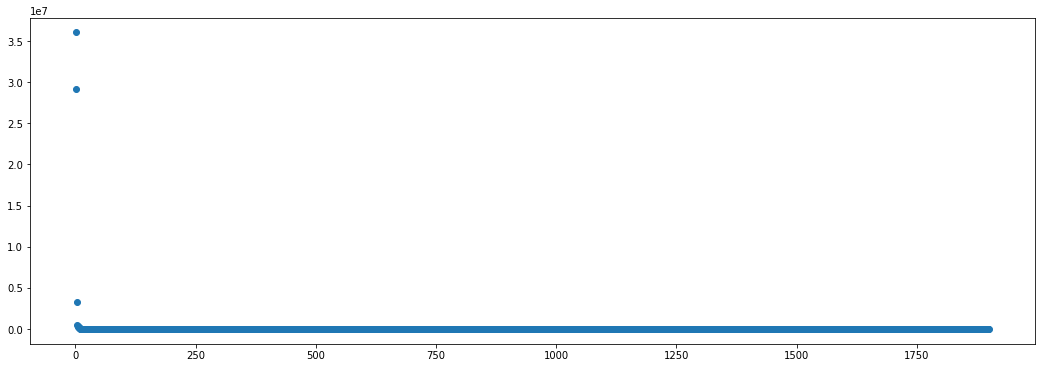

In [8]:
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(np.arange(1,len(eigvals)+1),eigvals)

In [9]:
I = 3
print("max eig vec : \n", eigvecs[0])
U = np.array(eigvecs).T
print("U=\n",U.shape)
Us, Un = U[:,:I], U[:,I:]
print("Us=\n",Us.shape)
print("Un=\n",Un.shape)

max eig vec : 
 [ 0.03518938-0.00074867j  0.02125791-0.00130072j  0.01807199-0.00010736j
 ... -0.00581503-0.00597923j -0.01515495-0.00206073j
 -0.01540877+0.0037046j ]
U=
 (1900, 1900)
Us=
 (1900, 3)
Un=
 (1900, 1897)


In [10]:
w = 2.0
N = len(eigvals)
def a(theta):
    a1 = np.exp(-1j*w*d*(np.sin(theta)/c) * np.arange(N) )
    return a1.reshape((N,1))

print(a(2))

[[1.        +0.j        ]
 [0.99994278-0.01069741j]
 [0.99977113-0.0213936j ]
 ...
 [0.1266323 -0.99194973j]
 [0.11601376-0.99324761j]
 [0.10538194-0.99443182j]]


In [11]:
def P_MU(theta):
    return complex(a(theta).conj().T @ Un @ Un.conj().T @ a(theta)).real
    
print(P_MU(2))

2237.660036141736


In [12]:
theta_vals = np.linspace(-200,200,1000)
P_MU_vals = np.array([P_MU(val) for val in theta_vals])
print(P_MU_vals)

[2261.3635656  2208.62229369 2217.82210818 2353.6659699  2443.39276486
 2246.68491521 2104.30625564 2095.33137557 2167.81849499 2159.97851685
 2174.81420691 2090.87893048 2136.43067741 2135.58365978 2443.322683
 2392.35203663 2229.14848737 2207.31000559 2234.6209747  2399.18501587
 2435.24021608 2106.84382524 2140.91681693 2094.28060137 2174.60920237
 2160.82813028 2162.65393845 2100.74185088 2091.20037562 2280.05667696
 2436.8656445  2337.75617652 2215.5325116  2209.45149988 2273.25576654
 2411.17233018 2378.11304121 2055.29317248 2130.53014384 2127.37016001
 2167.83192289 2167.74697012 2127.77504802 2130.26193151 2055.32095004
 2377.41951879 2411.30154015 2273.7872607  2209.49041733 2215.4464823
 2337.07822883 2436.56135232 2281.36946325 2090.6569584  2100.99622001
 2162.40676792 2160.87175146 2174.58219853 2094.47152301 2141.0357828
 2105.77048813 2434.83276943 2399.41327425 2234.87459313 2207.31429717
 2228.94527616 2392.00963736 2443.58085773 2136.8891809  2136.17673887
 2090.7882

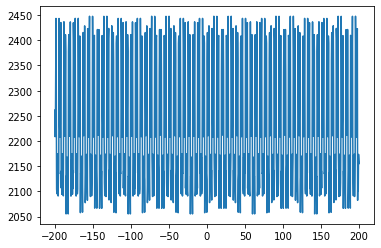

In [13]:
plt.plot(theta_vals,P_MU_vals)